In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# load shape space
with open(r'D:/Dropbox/CavityDesignHub/MuCol_Study/Cavities/cavity_data_mid_end_cells.json') as f:
    shape_space = json.load(f)
pp.pprint(shape_space)

{   'C3795_1300MHz': {   'BP': 'both',
                         'FREQ': 1300,
                         'IC': [   38.36,
                                   40.78,
                                   18.63,
                                   14.25,
                                   44.4,
                                   57.6521,
                                   105.56,
                                   113.76249257990644],
                         'OC': [   38.59,
                                   35.48,
                                   10.61,
                                   7.4,
                                   49.33,
                                   57.83,
                                   105.56,
                                   107.9],
                         'OC_R': [   38.59,
                                     35.48,
                                     10.61,
                                     7.4,
                                     49.33,
                

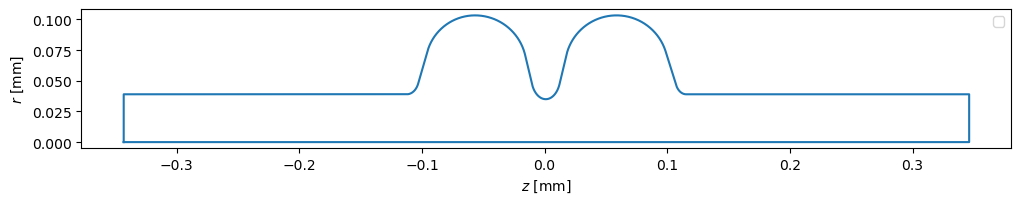

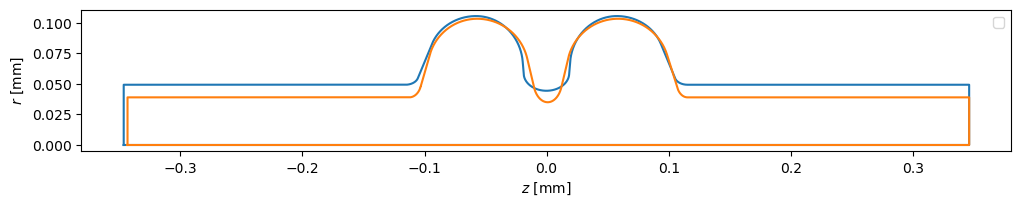

In [3]:
# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 100])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav0 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
ax = cav0.plot('geometry')

C3795_1300MHz = shape_space['C3795_1300MHz']
TESLA = shape_space['TESLA']

# create cavity
cav = Cavity(2, np.array(C3795_1300MHz['IC']), np.array(C3795_1300MHz['OC']), np.array(C3795_1300MHz['OC_R']), beampipe='both')
ax = cav.plot('geometry')

# create cavity
cav1 = Cavity(2, TESLA['IC'], TESLA['OC'], TESLA['OC_R'], beampipe='both')
# show cavity
cav1.plot('geometry', ax)
plt.show()

In [4]:
cav1.inspect(variation=0.5)

Output()

In [5]:
with open(r'D:/Dropbox/CavityDesignHub/PhD_Thesis/Cavities/cavities.json') as f:
    shape_space = json.load(f)
# pp.pprint(shape_space)

In [6]:
# define flattop cavity cepc
cepc_shape = shape_space['CEPCv2']
pp.pprint(cepc_shape)

{   'BP': 'both',
    'CELL TYPE': 'flattop',
    'FREQ': 650,
    'IC': [93, 93, 20, 30, 75, 115.5, 205.979, 4, 0],
    'OC': [80, 80, 20, 30, 80, 109, 205.979, 4, 0],
    'OC_R': [80, 80, 20, 30, 80, 109, 205.979, 4, 0]}


In [7]:
cepc = Cavity(2, cepc_shape['IC'], cepc_shape['OC'], cepc_shape['OC_R'], beampipe=cepc_shape['BP'], cell_parameterisation=cepc_shape['CELL TYPE'])

In [8]:
cepc.inspect(variation=0.6)

Output()

In [9]:
cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [10]:
cavs.add_cavity(cepc, 'CEPCv2', 'CEPCv2')

In [11]:
# cavs.run_eigenmode()

In [12]:
# cavs[0].plot_mesh()

In [13]:
# cavs[0].plot_fields()

In [14]:
cavs.eigenmode_qois

{}

In [ ]:
uq_config = {
    'variables': ['A', 'a'],
    'delta': [0.01, 0.01],
    'objectives': ['Epk/Eacc []', 'Bpk/Eacc [mT/MV/m]', 'R/Q [Ohm]', 'G [Ohm]', 'Q []'],
    'cell_type': 'mid-cell',
    'method': 'stroud5',
    'processes': 1
}
eigenmode_config = {
    'uq_config': uq_config
}

cavs.run_eigenmode(eigenmode_config)

In [20]:
cavs.uq_fm_results

{}

In [21]:
cavs.plot_compare_fm_bar(uq=True)

KeyError: 'metric'